In [7]:
import re
import pandas as pd
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

## Load the dataset


Dataset 1: Hate Speech and Offensive Language Dataset

In [9]:
# load dataset
dataset1 = pd.read_csv('/content/drive/MyDrive/ECE1786/Project/data/dataset1.csv')
dataset1_bak = dataset1.copy()
dataset1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
# only keep the text and label column
dataset1.drop(dataset1.columns[[0,1,2,3,4]], axis=1, inplace=True)
dataset1

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [11]:
# check the number of rows and columns
dataset1.shape

(24783, 2)

In [12]:
# check if there is any null item
dataset1.isnull().sum()

class    0
tweet    0
dtype: int64

## Data Cleaning

In [13]:
# helper function to convert abbreviated form to original form
def convert_to_original(phrase):
  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [14]:
# text data cleaning
def data_processing(text):
  # lower casing
  text = str(text).lower()

  # remove unicode strings
  text = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', text)

  # remove non-ascii characters
  text = re.sub(r'[^\x00-\x7f]', r'', text)

  # remove @user indicaters
  text = re.sub(r'@\w+', r'', text)

  # remove digits
  text = re.sub(r'\d', r'', text)

  # remove '#' symbols inside strings
  text = re.sub(r'#', r'', text)

  # remove urls
  text = re.sub(r'http\S+', r'', text)

  # remove multiple white spaces
  text = re.sub(r'[\s]+', r' ', text)

  # remove multiple break-line with single white space.
  text = re.sub(r'[\n]+', r' ', text)

  # tokenization
  text = nltk.word_tokenize(text)

  # convert abbreviated form to original form
  text = convert_to_original(' '.join(text)).split()

  # remove short strings with length=1 and length=2
  text = [word for word in text if not len(word) in [1,2]]

  # remove non-alphanumeric characters
  text = [word for word in text if word.isalpha()]

  return text

In [15]:
dataset1['tweet'] = dataset1['tweet'].apply(data_processing)
dataset1

,class,tweet
0,2,"[woman, you, should, not, complain, about, cle..."
1,1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,1,"[dawg, you, ever, fuck, bitch, and, she, start..."
3,1,"[she, look, like, tranny]"
4,1,"[the, shit, you, hear, about, might, true, mig..."
...,...,...
24778,1,"[you, muthaf, lie, right, his, trash, now, min..."
24779,2,"[you, have, gone, and, broke, the, wrong, hear..."
24780,1,"[young, buck, wan, eat, dat, nigguh, like, ain..."
24781,1,"[youu, got, wild, bitches, tellin, you, lies]"


In [16]:
# example before and after data cleaning
print(dataset1_bak['tweet'][0])
print(dataset1['tweet'][0])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
['woman', 'you', 'should', 'not', 'complain', 'about', 'cleaning', 'your', 'house', 'amp', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out']


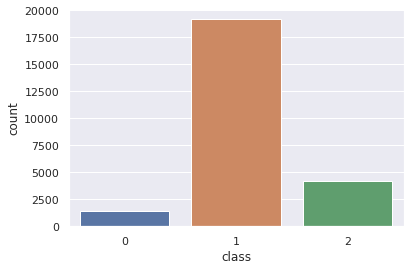

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=dataset1)